In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import seaborn as sns
sc.settings.set_figure_params(dpi=100)

In [6]:
# read in the levenshtein distance for the epitope information
df_l = pd.read_csv('../outputs/model_v3/full.epitope.levenshtein.csv', index_col=0)

[Text(0.5, 0, 'Levenshtein Distance'), Text(0, 0.5, 'Count')]

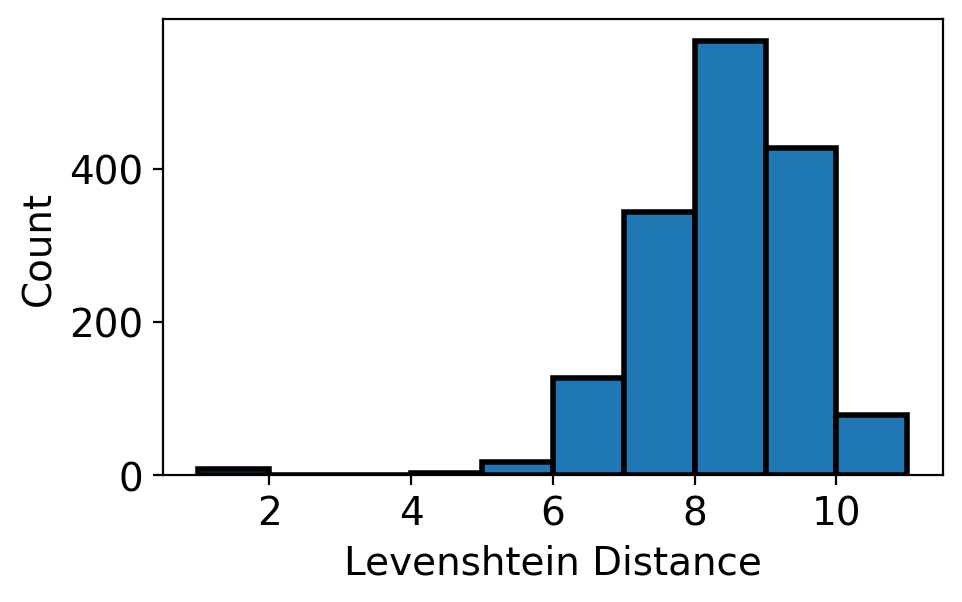

In [7]:
# check the levenshtein distance
fig, ax = plt.subplots(figsize=[5, 3])
ax.grid(False)
ax.hist(df_l.loc['NLVPMVATV'][df_l.loc['NLVPMVATV'] > 0], linewidth=2, edgecolor='k', width=1)
ax.set(xlabel='Levenshtein Distance', ylabel='Count')

In [8]:
# we'll read both of these values and the original input and irrelevant tcrs
cdr3_to_X = pd.read_csv('../outputs/model_v3/cdr3.conversion.n30.csv', index_col=0)
ag_to_X = pd.read_csv('../outputs/model_v3/epitope.conversion.n15.csv', index_col=0)
hit = pd.read_csv('../outputs/model_v3/full.input.X.csv', index_col=0)
irr = pd.read_csv('../outputs/model_v3/full.control.X.csv', index_col=0)
irr = irr.reset_index().iloc[:, 1:]

In [9]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import roc_curve, auc, accuracy_score
from tqdm import tqdm

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [10]:
# save the original hit and irr
hit_orig, irr_orig = hit.copy(), irr.copy()

4149 1383
4149 1383
Epoch 1/10
260/260 [==============================] - 2s 5ms/step - loss: 0.6450 - accuracy: 0.6070 - auc: 0.6613 - val_loss: 0.6213 - val_accuracy: 0.6349 - val_auc: 0.7009
Epoch 2/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5976 - accuracy: 0.6570 - auc: 0.7301 - val_loss: 0.6079 - val_accuracy: 0.6457 - val_auc: 0.7186
Epoch 3/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5704 - accuracy: 0.6729 - auc: 0.7574 - val_loss: 0.5956 - val_accuracy: 0.6522 - val_auc: 0.7288
Epoch 4/10
260/260 [==============================] - 1s 5ms/step - loss: 0.5452 - accuracy: 0.7025 - auc: 0.7844 - val_loss: 0.5973 - val_accuracy: 0.6537 - val_auc: 0.7363
Epoch 5/10
260/260 [==============================] - 1s 5ms/step - loss: 0.5233 - accuracy: 0.7201 - auc: 0.8059 - val_loss: 0.5805 - val_accuracy: 0.6761 - val_auc: 0.7488
Epoch 6/10
260/260 [==============================] - 1s 5ms/step - loss: 0.4928 - accuracy: 0.7413 - auc: 0.8

260/260 [==============================] - 1s 4ms/step - loss: 0.4941 - accuracy: 0.7337 - auc: 0.8290 - val_loss: 0.5994 - val_accuracy: 0.6645 - val_auc: 0.7457
Epoch 7/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4619 - accuracy: 0.7638 - auc: 0.8556 - val_loss: 0.6066 - val_accuracy: 0.6670 - val_auc: 0.7541
Epoch 8/10
260/260 [==============================] - 1s 5ms/step - loss: 0.4218 - accuracy: 0.7913 - auc: 0.8837 - val_loss: 0.6099 - val_accuracy: 0.6866 - val_auc: 0.7631
Epoch 9/10
260/260 [==============================] - 1s 4ms/step - loss: 0.3715 - accuracy: 0.8230 - auc: 0.9140 - val_loss: 0.6249 - val_accuracy: 0.6970 - val_auc: 0.7758
Epoch 10/10
346/346 [==============================] - 1s 2ms/step
4149 1383
4149 1383
Epoch 1/10
260/260 [==============================] - 2s 5ms/step - loss: 0.6496 - accuracy: 0.5941 - auc: 0.6510 - val_loss: 0.6273 - val_accuracy: 0.6273 - val_auc: 0.6884
Epoch 2/10
260/260 [==============================] - 

Epoch 1/10
260/260 [==============================] - 2s 5ms/step - loss: 0.6515 - accuracy: 0.5989 - auc: 0.6487 - val_loss: 0.6326 - val_accuracy: 0.6211 - val_auc: 0.6929
Epoch 2/10
260/260 [==============================] - 1s 4ms/step - loss: 0.6001 - accuracy: 0.6587 - auc: 0.7293 - val_loss: 0.6072 - val_accuracy: 0.6493 - val_auc: 0.7157
Epoch 3/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5716 - accuracy: 0.6768 - auc: 0.7585 - val_loss: 0.5969 - val_accuracy: 0.6482 - val_auc: 0.7269
Epoch 4/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5488 - accuracy: 0.6992 - auc: 0.7828 - val_loss: 0.5910 - val_accuracy: 0.6663 - val_auc: 0.7404
Epoch 5/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5235 - accuracy: 0.7255 - auc: 0.8090 - val_loss: 0.5892 - val_accuracy: 0.6649 - val_auc: 0.7427
Epoch 6/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4947 - accuracy: 0.7430 - auc: 0.8334 - val_loss: 0.58

Epoch 6/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5544 - accuracy: 0.6999 - auc: 0.7794 - val_loss: 0.6681 - val_accuracy: 0.6197 - val_auc: 0.6668
Epoch 7/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5268 - accuracy: 0.7216 - auc: 0.8078 - val_loss: 0.6973 - val_accuracy: 0.6262 - val_auc: 0.6753
Epoch 8/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4917 - accuracy: 0.7523 - auc: 0.8379 - val_loss: 0.7265 - val_accuracy: 0.6244 - val_auc: 0.6778
Epoch 9/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4490 - accuracy: 0.7771 - auc: 0.8694 - val_loss: 0.6998 - val_accuracy: 0.6381 - val_auc: 0.6900
Epoch 10/10
346/346 [==============================] - 1s 2ms/step
4149 1383
4149 1383
Epoch 1/10
260/260 [==============================] - 2s 5ms/step - loss: 0.6638 - accuracy: 0.5957 - auc: 0.6334 - val_loss: 0.6413 - val_accuracy: 0.6370 - val_auc: 0.6814
Epoch 2/10
260/260 [=======================

Epoch 1/10
260/260 [==============================] - 2s 6ms/step - loss: 0.6663 - accuracy: 0.5965 - auc: 0.6321 - val_loss: 0.6606 - val_accuracy: 0.6110 - val_auc: 0.6580
Epoch 2/10
260/260 [==============================] - 1s 5ms/step - loss: 0.6342 - accuracy: 0.6383 - auc: 0.6898 - val_loss: 0.6518 - val_accuracy: 0.6215 - val_auc: 0.6617
Epoch 3/10
260/260 [==============================] - 1s 4ms/step - loss: 0.6188 - accuracy: 0.6477 - auc: 0.7097 - val_loss: 0.6889 - val_accuracy: 0.5734 - val_auc: 0.6617
Epoch 4/10
260/260 [==============================] - 1s 4ms/step - loss: 0.6014 - accuracy: 0.6647 - auc: 0.7316 - val_loss: 0.6544 - val_accuracy: 0.6103 - val_auc: 0.6696
Epoch 5/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5810 - accuracy: 0.6787 - auc: 0.7539 - val_loss: 0.6528 - val_accuracy: 0.6197 - val_auc: 0.6746
Epoch 6/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5596 - accuracy: 0.6944 - auc: 0.7759 - val_loss: 0.65

Epoch 6/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5559 - accuracy: 0.7034 - auc: 0.7836 - val_loss: 0.6779 - val_accuracy: 0.6208 - val_auc: 0.6625
Epoch 7/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5215 - accuracy: 0.7357 - auc: 0.8166 - val_loss: 0.6899 - val_accuracy: 0.6132 - val_auc: 0.6629
Epoch 8/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4835 - accuracy: 0.7610 - auc: 0.8472 - val_loss: 0.6944 - val_accuracy: 0.6197 - val_auc: 0.6708
Epoch 9/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4434 - accuracy: 0.7907 - auc: 0.8752 - val_loss: 0.7236 - val_accuracy: 0.6200 - val_auc: 0.6739
Epoch 10/10
346/346 [==============================] - 1s 2ms/step
4149 1383
4149 1383
Epoch 1/10
260/260 [==============================] - 2s 5ms/step - loss: 0.6872 - accuracy: 0.5545 - auc: 0.5754 - val_loss: 0.6751 - val_accuracy: 0.5860 - val_auc: 0.6102
Epoch 2/10
260/260 [=======================

Epoch 1/10
260/260 [==============================] - 2s 5ms/step - loss: 0.6861 - accuracy: 0.5498 - auc: 0.5754 - val_loss: 0.6734 - val_accuracy: 0.5770 - val_auc: 0.6244
Epoch 2/10
260/260 [==============================] - 1s 4ms/step - loss: 0.6570 - accuracy: 0.6056 - auc: 0.6494 - val_loss: 0.6664 - val_accuracy: 0.6001 - val_auc: 0.6319
Epoch 3/10
260/260 [==============================] - 1s 4ms/step - loss: 0.6344 - accuracy: 0.6322 - auc: 0.6862 - val_loss: 0.6785 - val_accuracy: 0.5839 - val_auc: 0.6369
Epoch 4/10
260/260 [==============================] - 1s 4ms/step - loss: 0.6126 - accuracy: 0.6518 - auc: 0.7140 - val_loss: 0.6578 - val_accuracy: 0.6030 - val_auc: 0.6548
Epoch 5/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5837 - accuracy: 0.6727 - auc: 0.7492 - val_loss: 0.6574 - val_accuracy: 0.6164 - val_auc: 0.6670
Epoch 6/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5524 - accuracy: 0.7049 - auc: 0.7837 - val_loss: 0.66

Epoch 6/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5274 - accuracy: 0.7204 - auc: 0.8066 - val_loss: 0.6432 - val_accuracy: 0.6388 - val_auc: 0.7068
Epoch 7/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4981 - accuracy: 0.7423 - auc: 0.8315 - val_loss: 0.6390 - val_accuracy: 0.6435 - val_auc: 0.7135
Epoch 8/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4669 - accuracy: 0.7636 - auc: 0.8556 - val_loss: 0.6665 - val_accuracy: 0.6493 - val_auc: 0.7132
Epoch 9/10
260/260 [==============================] - 1s 5ms/step - loss: 0.4263 - accuracy: 0.7936 - auc: 0.8844 - val_loss: 0.6778 - val_accuracy: 0.6475 - val_auc: 0.7187
Epoch 10/10
346/346 [==============================] - 1s 2ms/step
4149 1383
4149 1383
Epoch 1/10
260/260 [==============================] - 2s 5ms/step - loss: 0.6724 - accuracy: 0.5776 - auc: 0.6149 - val_loss: 0.6702 - val_accuracy: 0.5846 - val_auc: 0.6179
Epoch 2/10
260/260 [=======================

Epoch 1/10
260/260 [==============================] - 2s 5ms/step - loss: 0.6779 - accuracy: 0.5689 - auc: 0.6047 - val_loss: 0.6593 - val_accuracy: 0.6085 - val_auc: 0.6512
Epoch 2/10
260/260 [==============================] - 1s 4ms/step - loss: 0.6430 - accuracy: 0.6250 - auc: 0.6769 - val_loss: 0.6514 - val_accuracy: 0.6085 - val_auc: 0.6628
Epoch 3/10
260/260 [==============================] - 1s 4ms/step - loss: 0.6112 - accuracy: 0.6510 - auc: 0.7180 - val_loss: 0.6354 - val_accuracy: 0.6186 - val_auc: 0.6780
Epoch 4/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5854 - accuracy: 0.6712 - auc: 0.7467 - val_loss: 0.6347 - val_accuracy: 0.6179 - val_auc: 0.6802
Epoch 5/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5614 - accuracy: 0.6941 - auc: 0.7749 - val_loss: 0.6353 - val_accuracy: 0.6312 - val_auc: 0.6950
Epoch 6/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5351 - accuracy: 0.7168 - auc: 0.8015 - val_loss: 0.63

Epoch 6/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5210 - accuracy: 0.7190 - auc: 0.8112 - val_loss: 0.6437 - val_accuracy: 0.6269 - val_auc: 0.6965
Epoch 7/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4878 - accuracy: 0.7467 - auc: 0.8396 - val_loss: 0.6805 - val_accuracy: 0.6218 - val_auc: 0.6925
Epoch 8/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4541 - accuracy: 0.7743 - auc: 0.8657 - val_loss: 0.6685 - val_accuracy: 0.6287 - val_auc: 0.6972
Epoch 9/10
260/260 [==============================] - 1s 5ms/step - loss: 0.4077 - accuracy: 0.8047 - auc: 0.8965 - val_loss: 0.7090 - val_accuracy: 0.6414 - val_auc: 0.7043
Epoch 10/10
346/346 [==============================] - 1s 2ms/step
4149 1383
4149 1383
Epoch 1/10
260/260 [==============================] - 2s 5ms/step - loss: 0.6725 - accuracy: 0.5786 - auc: 0.6153 - val_loss: 0.6529 - val_accuracy: 0.6067 - val_auc: 0.6634
Epoch 2/10
260/260 [=======================

Epoch 1/10
260/260 [==============================] - 2s 6ms/step - loss: 0.6743 - accuracy: 0.5776 - auc: 0.6097 - val_loss: 0.6586 - val_accuracy: 0.5958 - val_auc: 0.6510
Epoch 2/10
260/260 [==============================] - 1s 4ms/step - loss: 0.6364 - accuracy: 0.6322 - auc: 0.6815 - val_loss: 0.6542 - val_accuracy: 0.6121 - val_auc: 0.6653
Epoch 3/10
260/260 [==============================] - 1s 4ms/step - loss: 0.6083 - accuracy: 0.6482 - auc: 0.7150 - val_loss: 0.6323 - val_accuracy: 0.6280 - val_auc: 0.6782
Epoch 4/10
260/260 [==============================] - 1s 5ms/step - loss: 0.5829 - accuracy: 0.6656 - auc: 0.7415 - val_loss: 0.6284 - val_accuracy: 0.6182 - val_auc: 0.6828
Epoch 5/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5597 - accuracy: 0.6850 - auc: 0.7680 - val_loss: 0.6202 - val_accuracy: 0.6370 - val_auc: 0.7032
Epoch 6/10
260/260 [==============================] - 1s 4ms/step - loss: 0.5329 - accuracy: 0.7098 - auc: 0.7976 - val_loss: 0.62

260/260 [==============================] - 1s 4ms/step - loss: 0.5180 - accuracy: 0.7309 - auc: 0.8155 - val_loss: 0.6464 - val_accuracy: 0.6461 - val_auc: 0.7111
Epoch 7/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4873 - accuracy: 0.7542 - auc: 0.8413 - val_loss: 0.6419 - val_accuracy: 0.6500 - val_auc: 0.7194
Epoch 8/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4552 - accuracy: 0.7802 - auc: 0.8658 - val_loss: 0.6470 - val_accuracy: 0.6518 - val_auc: 0.7216
Epoch 9/10
260/260 [==============================] - 1s 4ms/step - loss: 0.4214 - accuracy: 0.7993 - auc: 0.8875 - val_loss: 0.6793 - val_accuracy: 0.6573 - val_auc: 0.7190
Epoch 10/10
346/346 [==============================] - 1s 2ms/step
0.8028769477160166 0.07249859672759036 0.6162960954446854 0.09909959086198283


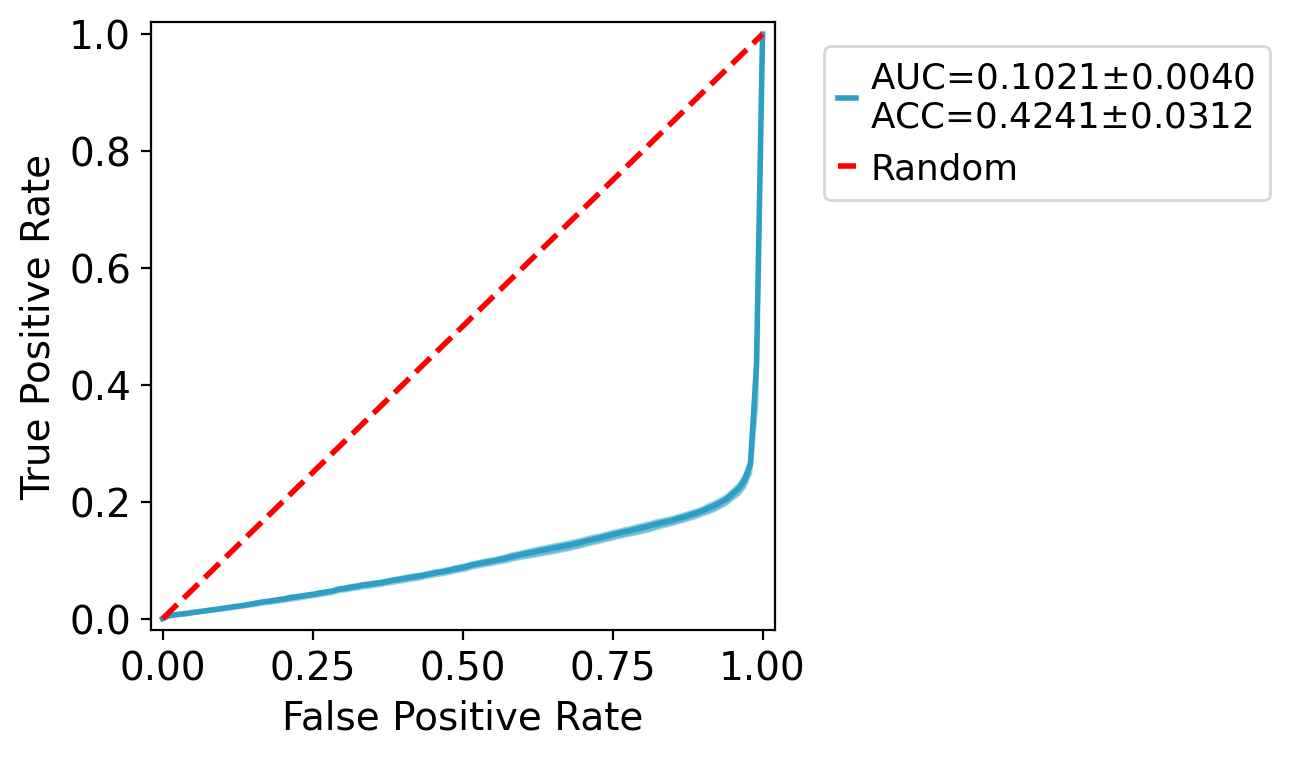

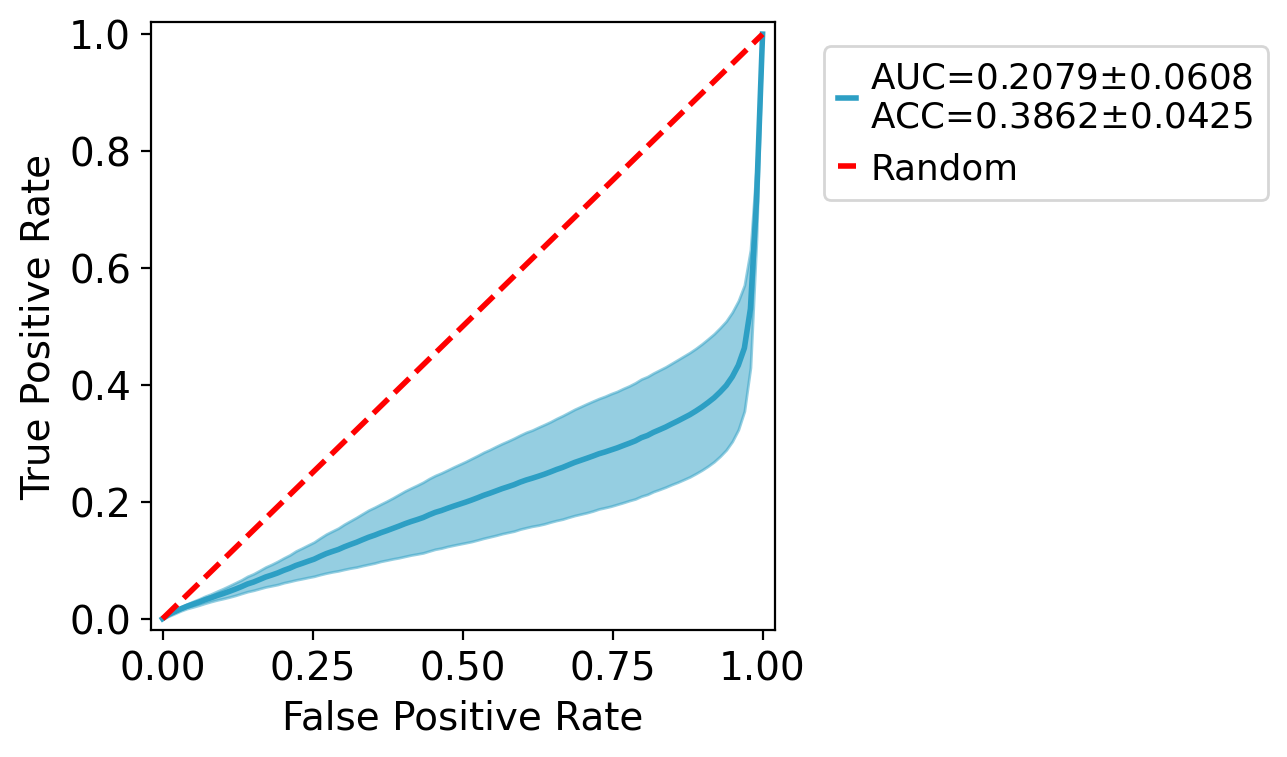

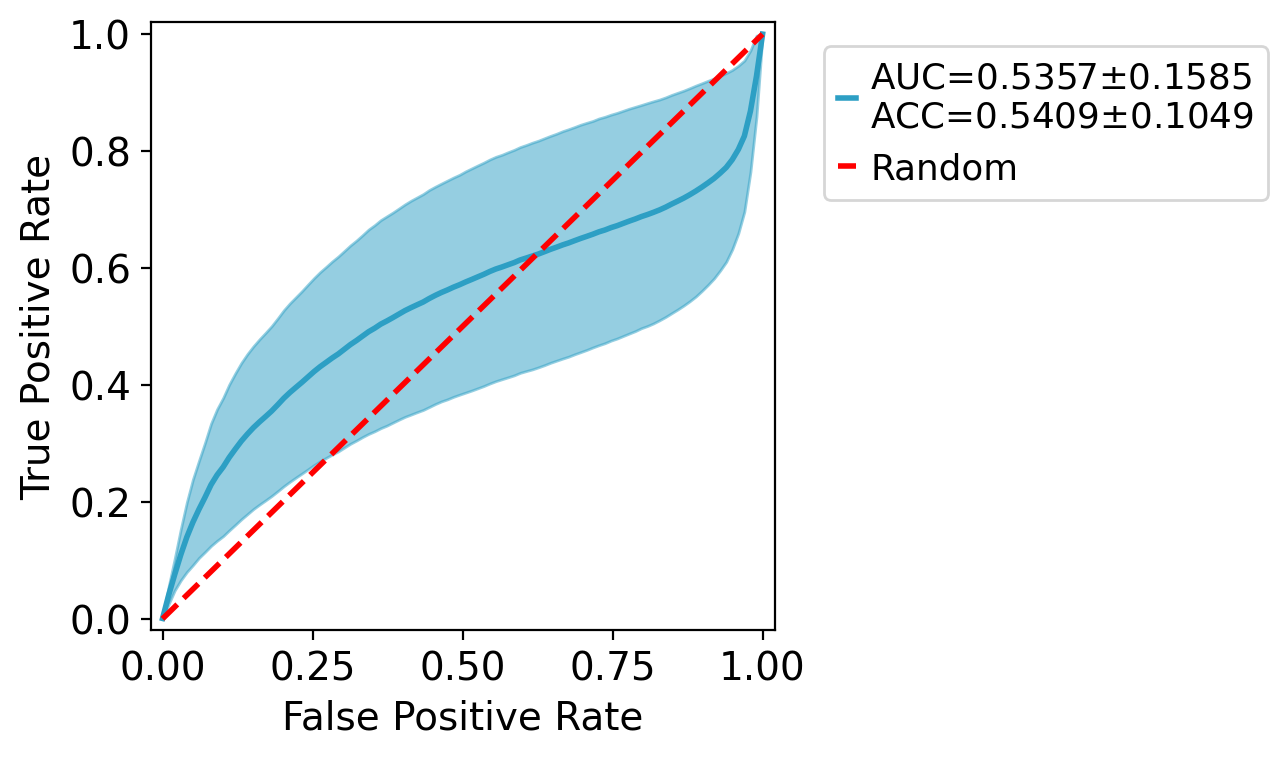

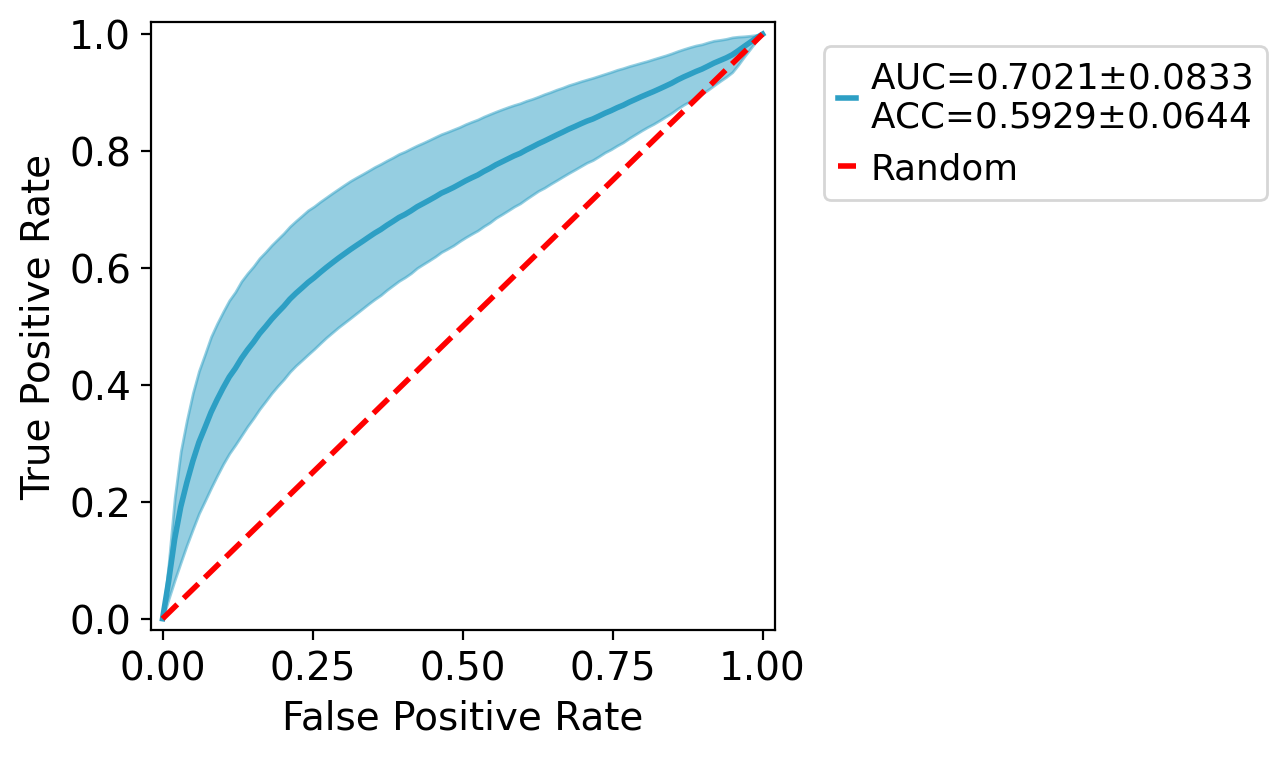

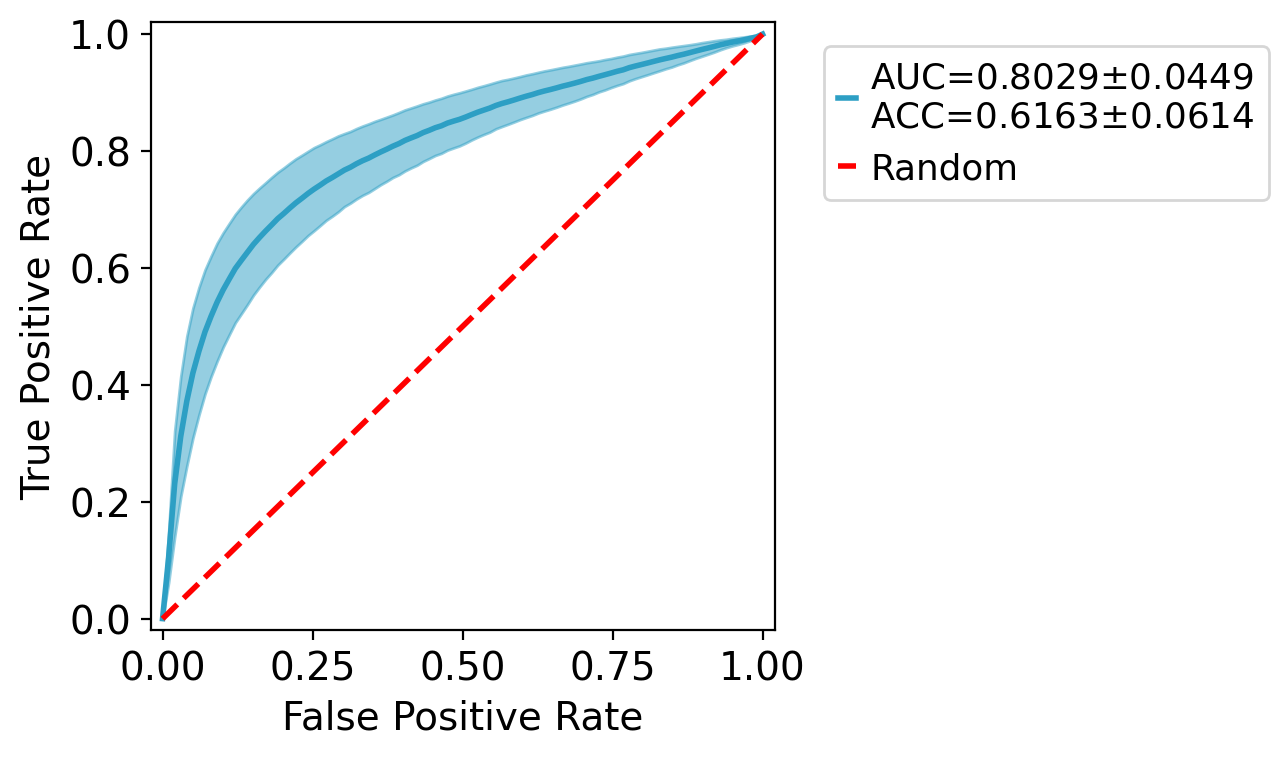

In [14]:
# check all possible levenshteins
vmax2stats = {}
for vmax in range(10, 5, -1):
    # set seed and identify irrelevant matches
    np.random.seed(0)
    
    # now retrieve the the temporary hit and irr
    hit, irr = hit_orig.copy(), irr_orig.copy()
    # strict cutoff method
    valid_peptides = df_l.index[(df_l['NLVPMVATV'] >= vmax) | (df_l.index == 'NLVPMVATV')]
    hit = hit.loc[hit['Epitope'].isin(valid_peptides)].reset_index().iloc[:, 1:]
    irr = irr.loc[irr['Epitope'].isin(valid_peptides)].reset_index().iloc[:, 1:]
    # resubset irr to be the same size as hit
    if irr.shape[0] != hit.shape[0]:
        need_replace = hit.shape[0] > irr.shape[0]
        valid_idxs = np.random.choice(irr.index, replace=need_replace, size=hit.shape[0])
        irr = irr.loc[valid_idxs].reset_index().iloc[:, 1:]
    
    # assemble hold out
    df_ext_X_hit = hit_orig.loc[hit_orig['Epitope'] == 'NLVPMVATV']
    df_ext_X_irr = irr_orig.loc[irr_orig['Epitope'] == 'NLVPMVATV']
    df_ext_y = pd.concat([pd.Series(np.ones(df_ext_X_hit.shape[0]), index=df_ext_X_hit),
                          pd.Series(np.zeros(df_ext_X_irr.shape[0]), index=df_ext_X_irr)], axis=0)
    df_ext_X = pd.concat([df_ext_X_hit, df_ext_X_irr], axis=0).reset_index().iloc[:, 1:]
    df_ext_y = df_ext_y.reset_index().iloc[:, 1]
    
    # retrieve values and aucs
    fprs, tprs, aucs, accs = [], [], [], []

    # complete 10 iterations
    for seed in range(10):
        ## SETUP CONSTANTS
        # grab a subset
        np.random.seed(seed)

        ## SEPARATE OUT TRAINING AND TESTING
        # disqualify peptides from hit and irr
        # define masks to ensure we only use non NLV specific CDR3s
        mask_hit = ~(hit['CDR3'].isin(df_ext_X['CDR3']) | hit['Epitope'].isin(df_ext_X['Epitope']))
        mask_irr = ~(irr['CDR3'].isin(df_ext_X['CDR3']) | irr['Epitope'].isin(df_ext_X['Epitope']))
        # use masks to determine size
        n_rows = df_ext_X_hit.shape[0]
        perc_train = 0.75
        
        # train and test
        # > subset target
        need_replace = n_rows > hit[mask_hit].shape[0]
        idxs = np.random.choice(hit.index[mask_hit], size=n_rows, replace=need_replace)
        idxs, idys = idxs[:round(n_rows * perc_train)], idxs[round(n_rows * perc_train):]
        print(len(idxs), len(idys))
        hit_train, hit_test = hit.loc[idxs], hit.loc[idys]
        # > subset control
        need_replace = n_rows > hit[mask_irr].shape[0]
        idxs = np.random.choice(irr.index[mask_irr], size=n_rows, replace=need_replace)
        idxs, idys = idxs[:round(n_rows * perc_train)], idxs[round(n_rows * perc_train):]
        print(len(idxs), len(idys))
        irr_train, irr_test = irr.loc[idxs], irr.loc[idys]
        # confirm no overlap
        assert not hit_train.index.isin(hit_test.index).all()
        assert not irr_train.index.isin(irr_test.index).all()


        ## CONVERT TO CORRECT FORMAT
        # create X for training
        X_train = pd.concat([hit_train, irr_train], axis=0).reset_index().iloc[:, 1:]
        X_train_cdr3s = cdr3_to_X.loc[X_train['CDR3']].reset_index().iloc[:, 1:]
        X_train_epitopes = ag_to_X.loc[X_train['Epitope']].reset_index().iloc[:, 1:]
        # combine
        X_train_cdr3s.columns = 'cdr3:' + X_train_cdr3s.columns
        X_train_epitopes.columns = 'ag:' + X_train_epitopes.columns
        X_train = X_train_cdr3s.join(X_train_epitopes)

        # grab y for training
        y_train = pd.concat([pd.Series(np.ones(hit_train.shape[0])),
                             pd.Series(np.zeros(irr_train.shape[0]))], axis=0).astype(int)
        y_train = y_train.reset_index().iloc[:, 1:][0]

        # confirm the same length
        assert X_train.shape[0] == y_train.shape[0]

        # create X for testing
        X_test = pd.concat([hit_test, irr_test], axis=0).reset_index().iloc[:, 1:]
        X_test_cdr3s = cdr3_to_X.loc[X_test['CDR3']].reset_index().iloc[:, 1:]
        X_test_epitopes = ag_to_X.loc[X_test['Epitope']].reset_index().iloc[:, 1:]
        # combine
        X_test_cdr3s.columns = 'cdr3:' + X_test_cdr3s.columns
        X_test_epitopes.columns = 'ag:' + X_test_epitopes.columns
        X_test = X_test_cdr3s.join(X_test_epitopes)

        # grab y for testing
        y_test = pd.concat([pd.Series(np.ones(hit_test.shape[0])),
                             pd.Series(np.zeros(irr_test.shape[0]))], axis=0).astype(int)
        y_test = y_test.reset_index().iloc[:, 1:][0]

        # confirm the same length
        assert X_test.shape[0] == y_test.shape[0]

        # create X for validation
        X_val = df_ext_X.copy().reset_index().iloc[:, 1:]
        X_val_cdr3s = cdr3_to_X.loc[X_val['CDR3']].reset_index().iloc[:, 1:]
        X_val_epitopes = ag_to_X.loc[X_val['Epitope']].reset_index().iloc[:, 1:]
        # combine
        X_val_cdr3s.columns = 'cdr3:' + X_val_cdr3s.columns
        X_val_epitopes.columns = 'ag:' + X_val_epitopes.columns
        X_val = X_val_cdr3s.join(X_val_epitopes)
        # grab y for validation
        y_val = df_ext_y.copy().reset_index().iloc[:, 1:][0]

        # confirm the same length
        assert X_val.shape[0] == y_val.shape[0]

        # remove constant columns
        X_train = X_train.loc[:, X_train.nunique(0) > 1]
        X_train = X_train.loc[:, X_train.sum(0) > 0]
        # read in normalization factors
        means = X_train.mean(0)
        stds = (X_train - means).std(0)
        # subset for relevant columns
        X_train = X_train[means.index]
        X_test = X_test[means.index]
        X_val = X_val[means.index]
        # normalize
        X_train -= means
        X_train /= stds
        X_test -= means
        X_test /= stds
        X_val -= means
        X_val /= stds

        ## SETUP MODEL
        # retrieve the appropriate columns
        cols_cdr3 = X_val.columns[X_val.columns.str.startswith('cdr3')]
        cols_ag = X_val.columns[X_val.columns.str.startswith('ag')]

        # determine model parameters
        # > layer for cdr3 alone
        input_1 = keras.layers.Input(shape=(len(cols_cdr3)))
        output_1 = keras.layers.Dense(200, activation='sigmoid')(input_1)
        # > layer for ag alone
        input_2 = keras.layers.Input(shape=(len(cols_ag)))
        output_2 = keras.layers.Dense(100, activation='sigmoid')(input_2)
        # > combined layer
        concat_3 = keras.layers.Concatenate()([output_1, output_2])
        output_3 = keras.layers.Dense(100, activation='sigmoid')(concat_3)
        # > final logit softmax layer
        output_4 = keras.layers.Dense(1, activation='sigmoid')(output_3)
        model = keras.Model(inputs=[input_1, input_2], outputs=[output_4])
        # set up the training parameters for the model
        model.compile(
            optimizer=keras.optimizers.Adam(),
            loss='binary_crossentropy',
            metrics=['accuracy','AUC'],
        )
        # train the model
        history = model.fit([X_train[cols_cdr3], X_train[cols_ag]], y_train,
                            epochs=10,
                            validation_data=([X_test[cols_cdr3], X_test[cols_ag]], y_test),
                            workers=40, use_multiprocessing=True)

        # testing predictions
        y_pred = model.predict([X_val[cols_cdr3], X_val[cols_ag]],
                               workers=40, use_multiprocessing=True)[:, 0]
        y_pred = pd.Series(y_pred, index=y_val.index, name='Pred%')
        y_pred = pd.concat([y_pred, y_val], axis=1)

        # retrieve auc metrics
        fpr, tpr, _ = roc_curve(y_pred[0], y_pred['Pred%'])
        fprs.append(fpr.tolist())
        tprs.append(tpr.tolist())
        aucs.append(auc(fpr, tpr))
        accs.append(accuracy_score(y_pred[0], y_pred['Pred%'].apply(round)))

    # create roc auc curve
    fig, ax = plt.subplots(figsize=[4, 4])
    ax.grid(False)
    # track values to compute mean value
    mean_tprs, mean_fpr = [], np.linspace(0, 1, 100)
    # plot the individual cv iterations
    for fpr, tpr in zip(fprs, tprs):
        # grab the true positive rate when we interpolate
        mean_tprs.append(np.interp(mean_fpr, fpr, tpr))
    #     # plot on this individual curve
    #     ax.plot(fpr, tpr, color='tab:blue', linestyle='--', linewidth=1, alpha=0.5, zorder=1)
    # grab metrics for auc
    mean_auc = np.mean(aucs)
    ci95_auc = 1.96 * np.std(aucs) / np.sqrt(len(aucs))
    # grab metrics for acc
    mean_acc = np.mean(accs)
    ci95_acc = 1.96 * np.std(accs) / np.sqrt(len(accs))
    # plot the average iteration
    mean_tpr = np.mean(mean_tprs, axis=0)
    ax.plot(mean_fpr, mean_tpr, color='#2D9FC4', linewidth=2,
            label=r'AUC=%0.4f$\pm$%0.4f' % (mean_auc, ci95_auc) + '\n' +
            r'ACC=%0.4f$\pm$%0.4f' % (mean_acc, ci95_acc))
    # plot the standard errors (95% CI actually)
    ci95_tpr = 1.96 * np.std(mean_tprs, axis=0) / np.sqrt(len(mean_tprs))
    mean_tprs_upper = np.minimum(mean_tpr + ci95_tpr, 1)
    mean_tprs_lower = np.maximum(mean_tpr - ci95_tpr, 0)
    ax.fill_between(mean_fpr, mean_tprs_lower, mean_tprs_upper, color='#2D9FC4', alpha=0.50)
    # plot the random line
    ax.plot([0,1], [0,1], color='r', linewidth=2, linestyle='--', label='Random')
    # add on labels and adjust limits
    ax.set_xlim(-0.02, 1.02)
    ax.set_ylim(-0.02, 1.02)
    ax.legend(bbox_to_anchor=(1.05,0.99), bbox_transform=ax.transAxes)
    ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
    print(np.mean(aucs), np.std(aucs), np.mean(accs), np.std(accs))
    
    # store it up
    vmax2stats[vmax] = fprs, tprs, aucs, accs

In [15]:
import pickle as pkl
with open('tmp.s3.pkl', 'wb') as f:
    pkl.dump(vmax2stats, f)

6 0.8028769477160166 0.07249859672759036 0.6162960954446854 0.09909959086198283
7 0.7020895957863511 0.13447039918289044 0.5929229934924078 0.10383579107036223
8 0.5357108304068252 0.25572526128990386 0.5408532176428055 0.16932259803568625
9 0.20793630884320452 0.0980358034969349 0.38617136659436013 0.0686071453938479
10 0.10211234843981432 0.00645191617059461 0.4241142443962401 0.05038838765986983


[Text(0.5, 0, 'False Positive Rate'), Text(0, 0.5, 'True Positive Rate')]

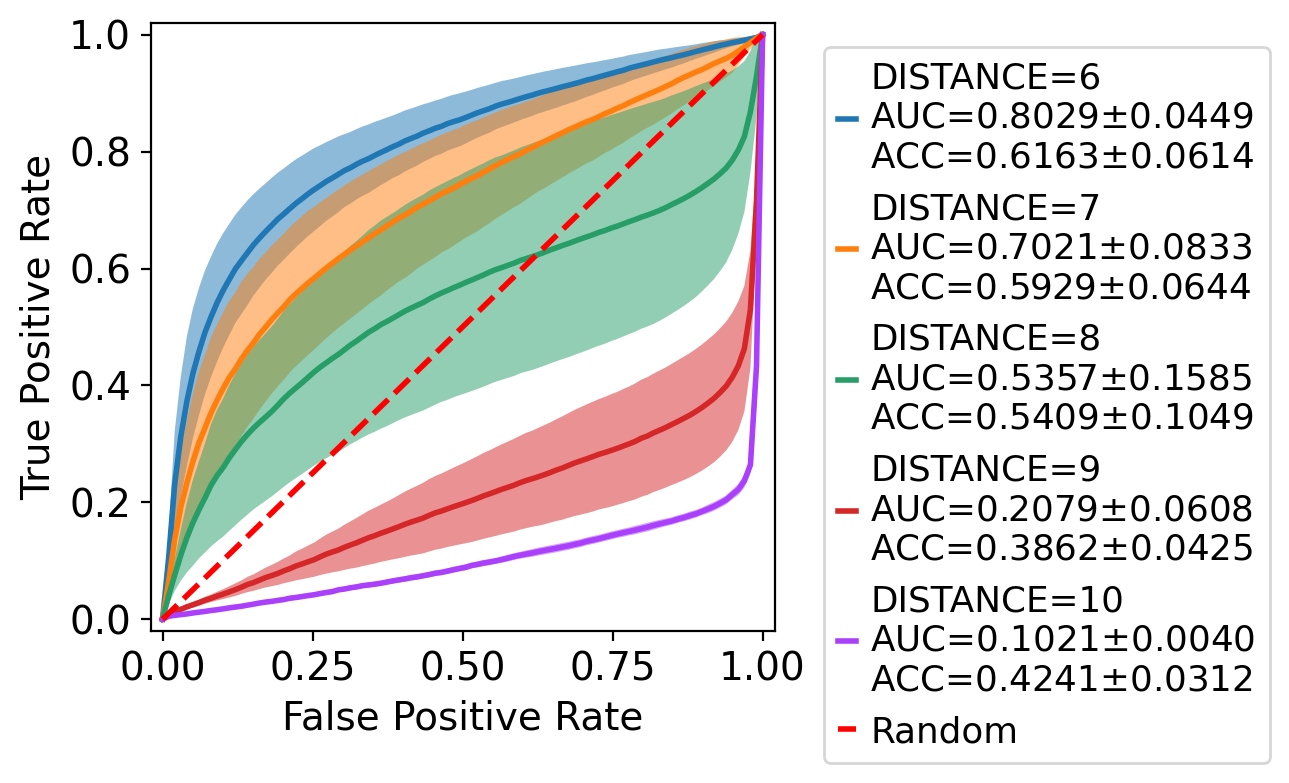

In [16]:
# create roc auc curve
fig, ax = plt.subplots(figsize=[4, 4])
ax.grid(False)
for vmax in range(6, 11):
    # unpack variables
    fprs, tprs, aucs, accs = vmax2stats[vmax]
    # track values to compute mean value
    mean_tprs, mean_fpr = [], np.linspace(0, 1, 100)
    # plot the individual cv iterations
    for fpr, tpr in zip(fprs, tprs):
        # grab the true positive rate when we interpolate
        mean_tprs.append(np.interp(mean_fpr, fpr, tpr))
    #     # plot on this individual curve
    #     ax.plot(fpr, tpr, color='tab:blue', linestyle='--', linewidth=1, alpha=0.5, zorder=1)
    # grab metrics for auc
    mean_auc = np.mean(aucs)
    ci95_auc = 1.96 * np.std(aucs) / np.sqrt(len(aucs))
    # grab metrics for acc
    mean_acc = np.mean(accs)
    ci95_acc = 1.96 * np.std(accs) / np.sqrt(len(accs))
    # plot the average iteration
    mean_tpr = np.mean(mean_tprs, axis=0)
    ax.plot(mean_fpr, mean_tpr, linewidth=2,
            label=f'DISTANCE={vmax}\n' + r'AUC=%0.4f$\pm$%0.4f' % (mean_auc, ci95_auc) + '\n' +
            r'ACC=%0.4f$\pm$%0.4f' % (mean_acc, ci95_acc))
    # plot the standard errors (95% CI actually)
    ci95_tpr = 1.96 * np.std(mean_tprs, axis=0) / np.sqrt(len(mean_tprs))
    mean_tprs_upper = np.minimum(mean_tpr + ci95_tpr, 1)
    mean_tprs_lower = np.maximum(mean_tpr - ci95_tpr, 0)
    ax.fill_between(mean_fpr, mean_tprs_lower, mean_tprs_upper, alpha=0.50)
    print(vmax, np.mean(aucs), np.std(aucs), np.mean(accs), np.std(accs))
# plot the random line
ax.plot([0,1], [0,1], color='r', linewidth=2, linestyle='--', label='Random')
# add on labels and adjust limits
ax.set_xlim(-0.02, 1.02)
ax.set_ylim(-0.02, 1.02)
ax.legend(bbox_to_anchor=(1.05,0.99), bbox_transform=ax.transAxes)
ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate')

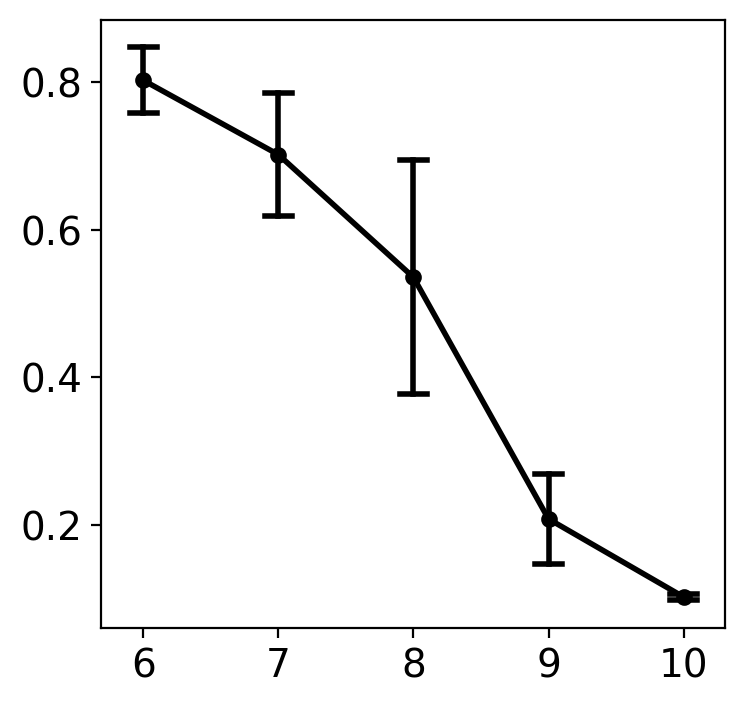

In [17]:
# get the values
xs = list(range(6, 11))
ys_mean = [np.mean(vmax2stats[x][2]) for x in xs]
ys_ci95 = [1.96 * np.std(vmax2stats[x][2]) / np.sqrt(len(vmax2stats[x][2])) for x in xs]
# create the plot
fig, ax = plt.subplots(figsize=[4, 4])
ax.grid(False)
ax.scatter(xs, ys_mean, color='k', s=2.5e1)
ax.plot(xs, ys_mean, color='k', lw=2)
# now plot the ci95s
for idx, x in enumerate(xs):
    # retrieve the data
    mean, ci95 = ys_mean[idx], ys_ci95[idx]
    # now plot the ci95
    ax.plot([x]*2, [mean-ci95, mean+ci95], color='k', lw=2)
    ax.plot([x-0.1, x+0.1], [mean-ci95]*2, color='k', lw=2)
    ax.plot([x-0.1, x+0.1], [mean+ci95]*2, color='k', lw=2)